In [2]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier

In [38]:
#Data counts
X, y = datasets.load_iris(return_X_y=True)
iris_count = X.shape[0]
print(iris_count)

X, y = datasets.load_breast_cancer(return_X_y=True)
bc_count = X.shape[0]
print(bc_count)

150
569


CV train 0.9716666666666667


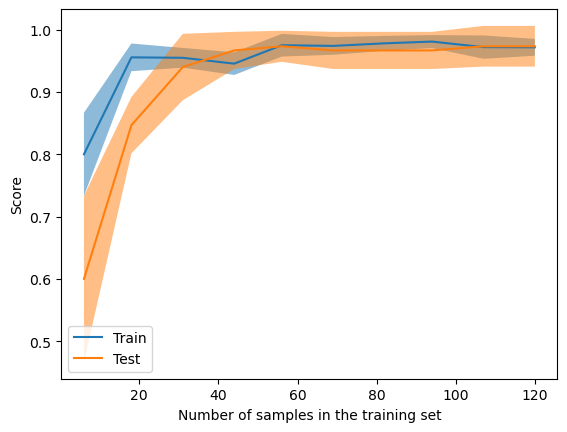

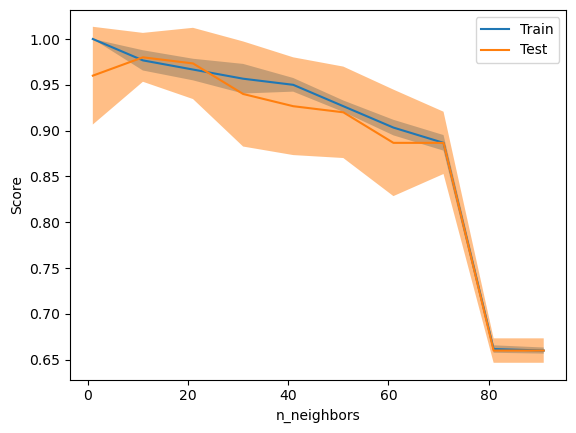

In [16]:
# Iris init

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "n_neighbors", param_range = [x for x in range(1,100,10)])



CV train 0.9633333333333333


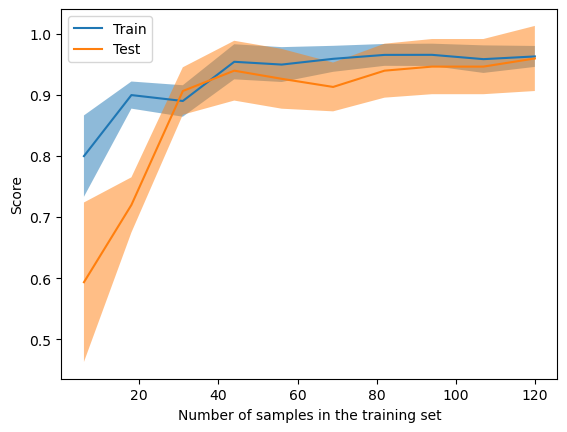

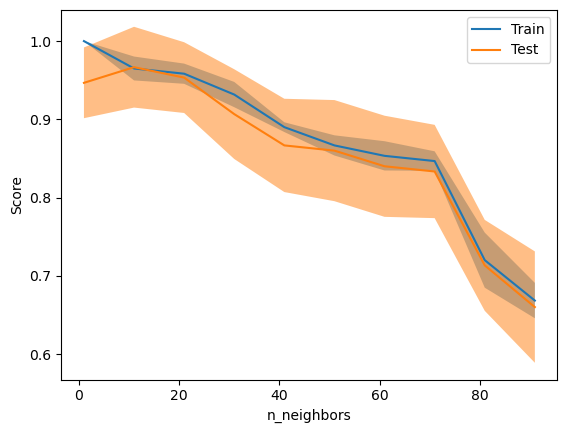

In [9]:
# Iris standardized

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 

X = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "n_neighbors", 
                                      param_range = [x for x in range(1,100,10)])



CV train 0.9481578947368421


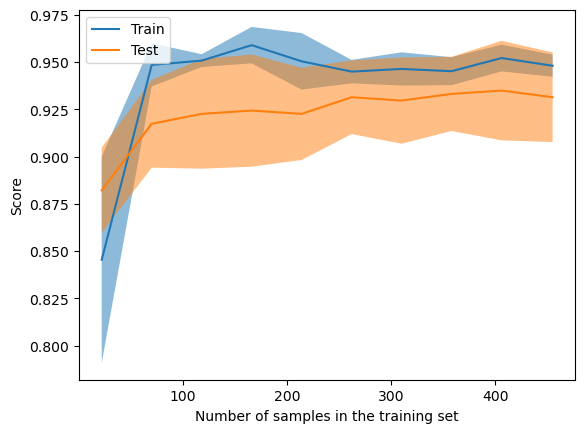

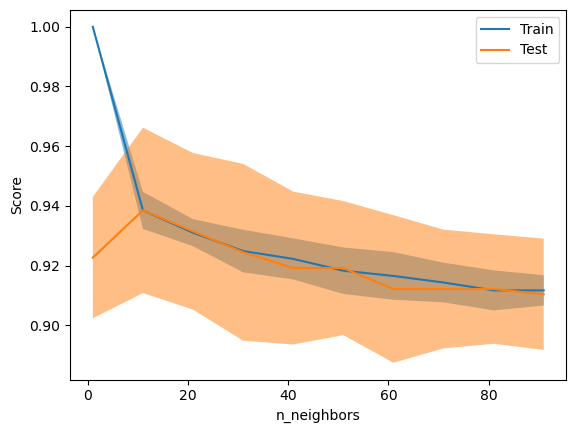

In [10]:
# BC init

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "n_neighbors", 
                                      param_range = [x for x in range(1,100,10)])



CV train 0.9789097744360904


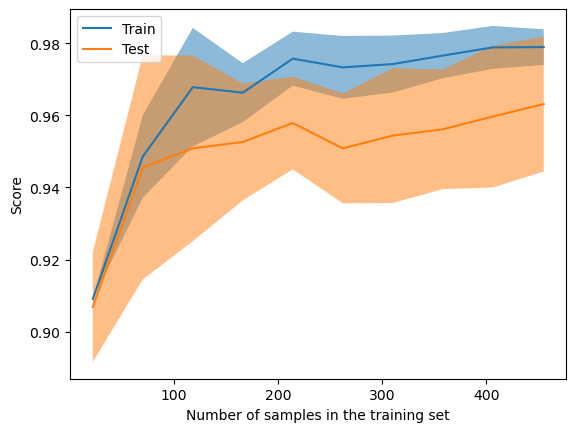

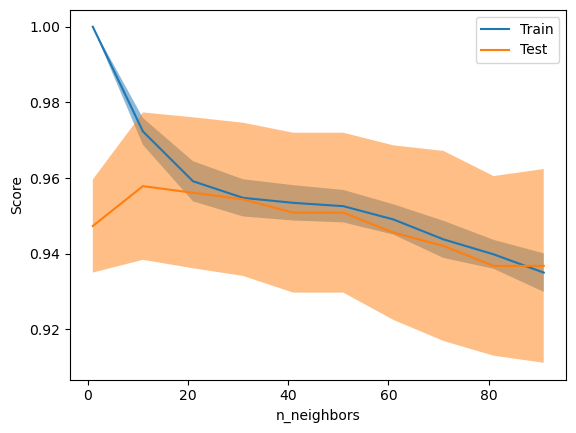

In [11]:
# BC standard

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

X = StandardScaler().fit_transform(X) 

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "n_neighbors", 
                                      param_range = [x for x in range(1,100,10)])



In [50]:
# grid search params bc

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

params = {'n_neighbors': [1,5,10,20,30], 'weights': ('uniform', 'distance'), 'metric': ('minkowski', 'chebyshev')}

gs = GridSearchCV(estimator= KNeighborsClassifier(), param_grid= params)

X_train, X_test, y_train, y_test = train_test_split(X, y)
p = gs.fit(X_train, y_train)
p.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}

In [51]:
# grid search params

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

params = {'n_neighbors': [x for x in range(1,50, 5)], 'weights': ('uniform', 'distance'), 'metric': ('minkowski', 'chebyshev')}

gs = GridSearchCV(estimator= KNeighborsClassifier(), param_grid= params)

X_train, X_test, y_train, y_test = train_test_split(X, y)
p = gs.fit(X_train, y_train)
p.best_params_

{'metric': 'chebyshev', 'n_neighbors': 6, 'weights': 'distance'}

In [5]:
# final training with optimal param

# iris
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
cv_results = cross_validate(clf, X, y)
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("training time:", fit_time)

CV test score: 0.9666666666666666
training time: 0.001402139663696289


In [6]:
# final training with optimal param

# BC
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

X = StandardScaler().fit_transform(X) 

clf = KNeighborsClassifier(n_neighbors = 12, weights = 'distance')
cv_results = cross_validate(clf, X, y)
f1_results = cross_validate(clf, X, y, scoring = 'f1')
f1_score =f1_results['test_score'].mean()
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("f1 test score:", f1_score)
print("training time:", fit_time)


CV test score: 0.9631268436578171
f1 test score: 0.9713151927437643
training time: 0.0026348590850830077


<Figure size 1000x600 with 0 Axes>

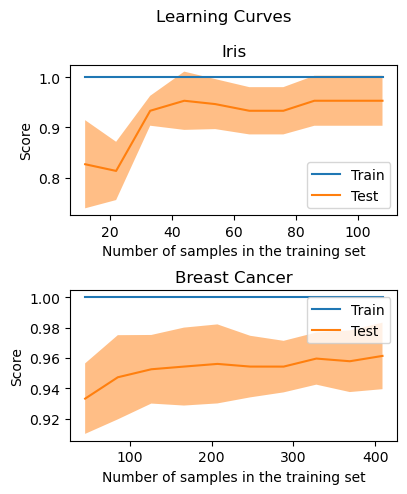

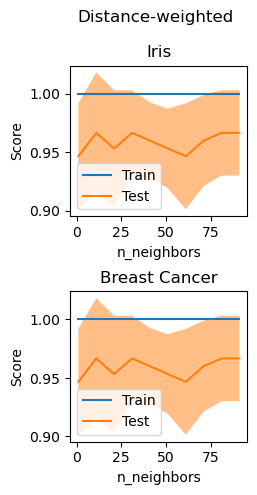

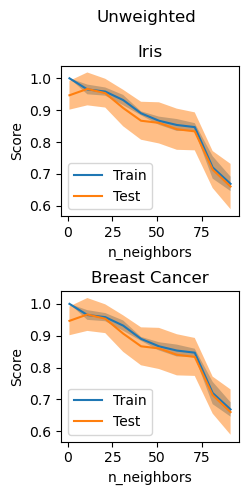

In [65]:
# final curves

# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
iris_x = StandardScaler().fit_transform(iris_x) 

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf1 = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
clf2 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance')


# learning curves
plt.figure(figsize=(10,6))
fig1, axs1 = plt.subplots(2)
fig1.set_figwidth(4)
fig1.suptitle("Learning Curves")
axs1[0].set_title("Iris")
axs1[1].set_title("Breast Cancer")
fig1.tight_layout()
fig1.subplots_adjust(hspace = .5)
LearningCurveDisplay.from_estimator(clf1, iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0])
LearningCurveDisplay.from_estimator(clf2, 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1])


# Validation curves

# K parameter
fig2, axs2 = plt.subplots(2)
fig2.suptitle("Distance-weighted")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(KNeighborsClassifier(weights = 'distance'), 
                                      iris_x, iris_y, 
                                      param_name= "n_neighbors", 
                                      param_range = [x for x in range(1,100,10)],
                                     ax = axs2[0])

ValidationCurveDisplay.from_estimator(KNeighborsClassifier(weights = 'distance'), 
                                      iris_x, iris_y, 
                                      param_name= "n_neighbors", 
                                      param_range = [x for x in range(1,100,10)],
                                     ax = axs2[1])

fig3, axs3 = plt.subplots(2)
fig3.suptitle("Unweighted")
axs3[0].set_title("Iris")
axs3[1].set_title("Breast Cancer")
fig3.tight_layout()
fig3.set_figwidth(2)
fig3.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(KNeighborsClassifier(), 
                                      iris_x, iris_y, 
                                      param_name= "n_neighbors", 
                                      param_range = [x for x in range(1,100,10)],
                                     ax = axs3[0])

ValidationCurveDisplay.from_estimator(KNeighborsClassifier(), 
                                      iris_x, iris_y, 
                                      param_name= "n_neighbors", 
                                      param_range = [x for x in range(1,100,10)],
                                     ax = axs3[1])


